In [1]:
# connecting to drive
# import os
# from google.colab import drive
# drive.mount("/content/drive")

In [2]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

In [3]:
# Create a class named Information which performs some action related to data frame information
class Information():
  ''' This class takes dataframe and performs actions like get df information,
   number of null values filled in each col, type of each column, and retuens dataframe'''
  #  difining contructor which accepts df
  def __init__(self, df):
    try:
      self.df = df
    except ValueError:
      print("Please provide dataframe only")

  def get_null_count(self):
    '''This fuction returns null value count for each column in given dataframe'''
    try :
      column_names = list(self.df.columns)
      null_values = list(self.df.isnull().sum().values)
      ser = pd.Series(null_values,column_names)
      null_dict = {}
      for key, value in ser.items():
        if value !=0:
          null_dict[key] = value
      return null_dict
    except ValueError:
      print("Please provide dataframe only")
    except TypeError:
      print("Please provide dataframe only")

  def get_info(self):
    '''This function prints information about given dataframe'''
    try:
      print(f"Number of Rows : {len(self.df.index)}", end='\n\n')
      print(f"{self.df.index}", end ="\n\n")
      print(f"Number of columns :{len(self.df.columns)}", end='\n\n')
      print(f"column Name : {np.array(self.df.columns)}", end='\n\n')
      print("Columns which has null values : ",self.get_null_count(), end='\n\n')
    except ValueError:
      print("Please provide dataframe only")
    except TypeError:
      print("Please provide dataframe only")

  def get_type(self):
    '''This fuction returns type of each column'''
    try:
      print("Type of each columns in dataframe :")
      print(self.df.dtypes)
    except ValueError:
      print("Please provide dataframe only")
    except TypeError:
      print("Please provide dataframe only")

  def col_info(self):
    ''' This fuction returns column name and value filled'''
    try:
      column_names = list(self.df.columns)
      for col in column_names:
        print(f'{col} : {self.df[col].unique()}', end='\n')
        print()
    except ValueError:
      print("Please provide dataframe only")
    except TypeError:
      print("Please provide dataframe only")

  def get_df(self):
    return self.df


In [4]:
# creating a class which merges dataframes
class MergedataSets:
  # defining constructor
  def __init__(self):
    pass
  # defining method which loads a data into dataframe
  def load_data(self):
    # This method loads data into dataframe
    try:
      self.df1 = pd.read_csv("/content/drive/MyDrive/Merge Mental Health/Mental_Health_Survey_2016.csv")
      self.df2 = pd.read_csv("/content/drive/MyDrive/Merge Mental Health/Mental_Health_Survey_2017.csv")
      self.df3 = pd.read_csv("/content/drive/MyDrive/Merge Mental Health/Mental_Health_Survey_2018.csv")
      self.df4 = pd.read_csv("/content/drive/MyDrive/Merge Mental Health/Mental_Health_Survey_2019.csv")
      self.df5 = pd.read_csv("/content/drive/MyDrive/Merge Mental Health/Mental_Health_Survey_2020.csv")
      self.df6 = pd.read_csv("/content/drive/MyDrive/Merge Mental Health/Mental_Health_Survey_2021.csv")
    except FileNotFoundError:
      print("Please provide correct path")

  # defining merge function for  datasets
  def merge_dfs(self):
    '''Accepts six dataframes merge it and resturns merged dataset'''
    # col_names variable contains all column names which are used for merged dataset
    col_names=['LeaveEase','CountryWork','Interference_Treated','LearnOnlineResources','Self_Employed',
    'ImpactCoworkers','LearnResources','Share_friends/family',
    'StateLive','AnonymityProtected','Observations_Impact','Employees_Count','PH_Issue_to_Interview',
    'RevealCoworkers','CountryLive','Age','ImpactClients','RevealClients','Gender','TechRole',
    'MentalHealthBenefits','ProductivityAffected','Family_History','Professional_Treatment',
    'Interference_Untreated','KnowCoverage','Past_MH_Disorder','current_MH_Disorder','StateWork',
    'wellness_campaign','TechCompany','Comfortable_with_supervisor',
    'PrivateMedicalCoverage','ProductivityPercentage','MH_Issue_to_Interview']
    try:
      mergerd_df = pd.concat([self.df1[col_names], self.df2[col_names], self.df3[col_names], self.df4[col_names], self.df5[col_names], self.df6[col_names]], axis=0)
      mergerd_df = mergerd_df.set_index(pd.Index(range(0,3269)))
      return mergerd_df
    except ValueError:
      print("Please send dataframe only")
    except TypeError:
      print("Please send dataframe only")

  def rename_column(self):
    '''This method renames all questions asked in the survey into single word which is used as column names
    Deletes those columns which are unnesscery for EDA'''
    dict1 = {'What is your age?': 'Age',
    'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?': 'AnonymityProtected',
    'Would you feel comfortable discussing a mental health disorder with your coworkers?': 'Comfortable_with_coworkers',
    'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?': 'Comfortable_with_supervisor',
    'What country do you live in?': 'CountryLive',
    'What country do you work in?': 'CountryWork',
    'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?': 'delete',
    'If yes, what condition(s) have you been diagnosed with?': 'delete',
    'Do you think that discussing a physical health issue with your employer would have negative consequences?': 'delete',
    'How many employees does your company or organization have?': 'Employees_Count',
    'Do you have a family history of mental illness?': 'Family_History',
    'What is your gender?': 'Gender',
    'Do you feel that being identified as a person with a mental health issue would hurt your career?': 'Hurt_Career',
    'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?': 'ImpactClients',
    'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?': 'ImpactCoworkers',
    'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?': 'Interference_Treated',
    'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?': 'Interference_Untreated',
    'Do you know the options for mental health care available under your employer-provided coverage?': 'KnowCoverage',
    'Do you know local or online resources to seek help for a mental health disorder?': 'LearnOnlineResources',
    'Does your employer offer resources to learn more about mental health concerns and options for seeking help?': 'LearnResources',
    'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:': 'LeaveEase',
    'Would you bring up a mental health issue with a potential employer in an interview?': 'MH_Issue_to_Interview',
    'Does your employer provide mental health benefits as part of healthcare coverage?': 'MentalHealthBenefits',
    'Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?': 'Observations_Impact',
    'Would you be willing to bring up a physical health issue with a potential employer in an interview?': 'PH_Issue_to_Interview',
    'Have you had a mental health disorder in the past?': 'Past_MH_Disorder',
    'Do you have previous employers?': 'PrevEmployers',
    'Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?': 'PrivateMedicalCoverage',
    'Do you have medical coverage (private insurance or state-provided) which includes treatment of \xa0mental health issues?': 'PrivateMedicalCoverage',
    'Do you believe your productivity is ever affected by a mental health issue?': 'ProductivityAffected',
    'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?': 'ProductivityPercentage',
    'Have you been diagnosed with a mental health condition by a medical professional?': 'Professional_Treatment',
    'Do you work remotely?': 'delete',
    'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?': 'RevealClients',
    'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?': 'RevealCoworkers',
    'If maybe, what condition(s) do you believe you have?': 'delete',
    'Are you self-employed?': 'Self_Employed',
    'Do you feel that your employer takes mental health as seriously as physical health?': 'delete',
    'How willing would you be to share with friends and family that you have a mental illness?': 'Share_friends/family',
    'What US state or territory do you live in?': 'StateLive',
    'What US state or territory do you work in?': 'StateWork',
    'Is your employer primarily a tech company/organization?': 'TechCompany',
    'Is your primary role within your company related to tech/IT?': 'TechRole',
    'Have you ever sought treatment for a mental health issue from a mental health professional?': 'delete',
    'If so, what condition(s) were you diagnosed with?': 'delete',
    'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?': 'UnsupportiveResponse',
    'Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?': 'delete',
    'Which of the following best describes your work position?': 'delete',
    'Do you currently have a mental health disorder?': 'current_MH_Disorder',
    'Have your previous employers provided mental health benefits?': 'delete',
    'Were you aware of the options for mental health care provided by your previous employers?': 'delete',
    'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?': 'delete',
    'Did your previous employers provide resources to learn more about mental health issues and how to seek help?': 'delete',
    'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?': 'delete',
    'Do you think that discussing a mental health disorder with previous employers would have negative consequences?': 'delete',
    'Do you think that discussing a physical health issue with previous employers would have negative consequences?': 'delete',
    'Would you have been willing to discuss a mental health issue with your previous co-workers?': 'delete',
    'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?': 'delete',
    'Did you feel that your previous employers took mental health as seriously as physical health?': 'delete',
    'Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?': 'delete',
    'Why or why not?': 'delete',
    'Why or why not?.1': 'delete',
    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?': 'wellness_campaign',
    'Do you think that discussing a mental health disorder with your employer would have negative consequences?' : 'DiscussNegConseq'}

    self.df1 = self.df1.rename(columns=dict1)
    delete_col = ['delete']
    self.df1.drop(columns=delete_col, inplace=True)
    self.df1.reset_index(drop=True, inplace=True)
    new_indices = range(1,1434)
    selfdf1 = self.df1.set_index(pd.Index(new_indices))

    dict2 = {'What is your age?': 'Age',
    'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?': 'AnonymityProtected',
    'Has being identified as a person with a mental health issue affected your career?': 'delete',
    'Would you feel comfortable discussing a mental health issue with your coworkers?': 'Comfortable_with_coworkers',
    'Have you ever discussed your mental health with coworkers?': 'DiscussCoworkers',
    'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?': 'Comfortable_with_supervisor',
    'What country do you <strong>live</strong> in?': 'CountryLive',
    'What country do you <strong>work</strong> in?': 'CountryWork',
    'Have you ever been diagnosed with a mental health disorder?': 'Diagnosed_Disorder',
    'Have you ever discussed your mental health with your employer?': 'DiscussEmployer',
    'How many employees does your company or organization have?': 'Employees_Count',
    'Do you have a family history of mental illness?': 'Family_History',
    'What is your gender?': 'Gender',
    'If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?': 'ImpactClients',
    'If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?': 'ImpactCoworkers',
    'Overall, how much importance does your employer place on mental health?': 'Importance_on_MH',
    'Overall, how much importance did your previous employer place on mental health?': 'Importance_on_MH',
    'Overall, how much importance does your employer place on physical health?': 'Importance_on_PH',
    'Overall, how much importance did your previous employer place on physical health?': 'Importance_on_PH',
    'If you have a mental health disorder, how often do you feel that it interferes with your work <strong>when being treated effectively?</strong>': 'Interference_Treated',
    'If you have a mental health disorder, how often do you feel that it interferes with your work <strong>when <em>NOT</em> being treated effectively (i.e., when you are experiencing symptoms)?</strong>': 'Interference_Untreated',
    'Do you know the options for mental health care available under your employer-provided health coverage?': 'KnowCoverage',
    'Do you know local or online resources to seek help for a mental health issue?': 'LearnOnlineResources',
    'Does your employer offer resources to learn more about mental health disorders and options for seeking help?': 'LearnResources',
    'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?': 'LeaveEase',
    'Would you bring up your mental health with a potential employer in an interview?': 'MH_Issue_to_Interview',
    'Does your employer provide mental health benefits\xa0as part of healthcare coverage?': 'MentalHealthBenefits',
    'Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?': 'Observations_Impact',
    'Are you openly identified at work as a person with a mental health issue?': 'Openly_Identified',
    'Would you be willing to bring up a physical health issue with a potential employer in an interview?': 'PH_Issue_to_Interview',
    'Have you had a mental health disorder in the past?': 'Past_MH_Disorder',
    '<strong>Do you have previous employers?</strong>': 'PrevEmployers',
    'Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?': 'PrivateMedicalCoverage',
    'Do you believe your productivity is ever affected by a mental health issue?': 'ProductivityAffected',
    'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?': 'ProductivityPercentage',
    'Have you ever sought treatment for a mental health disorder from a mental health professional?': 'Professional_Treatment',
    '<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?</strong>': 'RevealClients',
    '<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?</strong>': 'RevealCoworkers',
    '<strong>Are you self-employed?</strong>': 'Self_Employed',
    'How willing would you be to share with friends and family that you have a mental illness?': 'Share_friends/family',
    'What US state or territory do you <strong>live</strong> in?': 'StateLive',
    'What US state or territory do you <strong>work</strong> in?': 'StateWork',
    'Is your employer primarily a tech company/organization?': 'TechCompany',
    'Is your primary role within your company related to tech/IT?': 'TechRole',
    '<strong>Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?</strong>': 'UnsupportiveResponse',
    'Do you currently have a mental health disorder?': 'current_MH_Disorder',
    '#': 'delete',
    'How has it affected your career?': 'Career_Affect',
    'If they knew you suffered from a mental health disorder,\xa0how do you think that team members/co-workers would react?': 'delete',
    'Describe the circumstances of the badly handled or unsupportive response.': 'delete',
    '<strong>Have you observed or experienced supportive or well handled response to a mental health issue in your current or previous workplace?</strong>': 'SupportiveResponse',
    'Describe the circumstances of the supportive or well handled response.': 'delete',
    'Overall, how well do you think the tech industry supports employees with mental health issues?': 'Company_support',
    'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.': 'delete',
    'If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.': 'delete',
    'Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used <em>anonymously</em>\xa0and only with your permission.)': 'delete',
    'What is your race?': 'delete',
    'Other.3': 'delete',
    'Start Date (UTC)': 'delete',
    'Submit Date (UTC)': 'delete',
    'Network ID': 'delete',
    'Would you feel more comfortable talking to your coworkers about your physical health or your mental health?': 'delete',
    'Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.': 'delete',
    'Describe the conversation with coworkers you had about your mental health including their reactions.': 'delete',
    "Have you ever had a coworker discuss their or another coworker's mental health with you?": 'delete',
    'Describe the conversation your coworker had with you about their mental health (please do not use names).': 'delete',
    'Was your employer primarily a tech company/organization?': 'delete',
    '<strong>Have your previous employers provided mental health benefits?</strong>': 'delete',
    '<strong>Were you aware of the options for mental health care provided by your previous employers?</strong>': 'delete',
    'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?': 'delete',
    'Did your previous employers provide resources to learn more about mental health disorders and how to seek help?': 'delete',
    'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?': 'delete',
    'Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?': 'delete',
    'Would you have been willing to discuss your mental health with your direct supervisor(s)?': 'delete',
    'Did you ever discuss your mental health with your previous employer?': 'delete',
    'Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.': 'delete',
    '<strong>Would you have been willing to discuss your mental health with your coworkers at previous employers?</strong>': 'delete',
    'Did you ever discuss your mental health with a previous coworker(s)?': 'delete',
    'Describe the conversation you had with your previous coworkers about your mental health including their reactions.': 'delete',
    "Did you ever have a previous coworker discuss their or another coworker's mental health with you?": 'delete',
    'Describe the conversation your coworker had with you about their mental health (please do not use names)..1': 'delete',
    'Anxiety Disorder (Generalized, Social, Phobia, etc)': 'delete',
    'Mood Disorder (Depression, Bipolar Disorder, etc)': 'delete',
    'Psychotic Disorder (Schizophrenia, Schizoaffective, etc)': 'delete',
    'Eating Disorder (Anorexia, Bulimia, etc)': 'delete',
    'Attention Deficit Hyperactivity Disorder': 'delete',
    'Personality Disorder (Borderline, Antisocial, Paranoid, etc)': 'delete',
    'Obsessive-Compulsive Disorder': 'delete',
    'Post-Traumatic Stress Disorder': 'delete',
    'Stress Response Syndromes': 'delete',
    'Dissociative Disorder': 'delete',
    'Substance Use Disorder': 'delete',
    'Addictive Disorder': 'delete',
    'Other': 'delete',
    'Anxiety Disorder (Generalized, Social, Phobia, etc).1': 'delete',
    'Mood Disorder (Depression, Bipolar Disorder, etc).1': 'delete',
    'Psychotic Disorder (Schizophrenia, Schizoaffective, etc).1': 'delete',
    'Eating Disorder (Anorexia, Bulimia, etc).1': 'delete',
    'Attention Deficit Hyperactivity Disorder.1': 'delete',
    'Personality Disorder (Borderline, Antisocial, Paranoid, etc).1': 'delete',
    'Obsessive-Compulsive Disorder.1': 'delete',
    'Post-traumatic Stress Disorder': 'delete',
    'Stress Response Syndromes.1': 'delete',
    'Dissociative Disorder.1': 'delete',
    'Substance Use Disorder.1': 'delete',
    'Addictive Disorder.1': 'delete',
    'Other.1': 'delete',
    'Anxiety Disorder (Generalized, Social, Phobia, etc).2': 'delete',
    'Mood Disorder (Depression, Bipolar Disorder, etc).2': 'delete',
    'Psychotic Disorder (Schizophrenia, Schizoaffective, etc).2': 'delete',
    'Eating Disorder (Anorexia, Bulimia, etc).2': 'delete',
    'Attention Deficit Hyperactivity Disorder.2': 'delete',
    'Personality Disorder (Borderline, Antisocial, Paranoid, etc).2': 'delete',
    'Obsessive-Compulsive Disorder.2': 'delete',
    'Post-traumatic Stress Disorder.1': 'delete',
    'Stress Response Syndromes.2': 'delete',
    'Dissociative Disorder.2': 'delete',
    'Substance Use Disorder.2': 'delete',
    'Addictive Disorder.2': 'delete',
    'Other.2': 'delete',
    'Why or why not?': 'delete',
    'Why or why not?.1': 'delete',
    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?': 'wellness_campaign'}

    self.df2 = self.df2.rename(columns=dict2)
    self.df2.drop(columns=['delete'], inplace=True)
    self.df2.reset_index(drop=True, inplace=True)
    new_indices2 = range(1435,2191)
    self.df2 = self.df2.set_index(pd.Index(new_indices2))

    question_mapping3 = {'What is your age?': 'Age',
    'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?': 'AnonymityProtected',
    'How has it affected your career?': 'Career_Affect',
    'Would you feel comfortable discussing a mental health issue with your coworkers?': 'Comfortable_with_coworkers',
    'Have you ever discussed your mental health with coworkers?': 'DiscussCoworkers',
    'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?': 'Comfortable_with_supervisor',
    'Overall, how well do you think the tech industry supports employees with mental health issues?': 'Company_support',
    'What country do you <strong>live</strong> in?': 'CountryLive',
    'What country do you <strong>work</strong> in?': 'CountryWork',
    "Have you ever had a coworker discuss their or another coworker's mental health with you?": 'Coworker_Discuss',
    'If they knew you suffered from a mental health disorder, how do you think that team members/co-workers would react?': 'Coworkers_Reaction',
    'Have you ever been diagnosed with a mental health disorder?': 'Diagnosed_Disorder',
    'Have you ever discussed your mental health with your employer?': 'DiscussEmployer',
    'Would you feel more comfortable talking to your coworkers about your physical health or your mental health?': 'Comfortable_with_coworkers',
    'How many employees does your company or organization have?': 'Employees_Count',
    'Do you have a family history of mental illness?': 'Family_History',
    'What is your gender?': 'Gender',
    'Has being identified as a person with a mental health issue affected your career?': 'Hurt_Career',
    'If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?': 'ImpactClients',
    'If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?': 'ImpactCoworkers',
    'Overall, how much importance does your employer place on mental health?': 'Importance_on_MH',
    'Overall, how much importance does your employer place on physical health?': 'Importance_on_PH',
    'If you have a mental health disorder, how often do you feel that it interferes with your work <strong>when being treated effectively?</strong>': 'Interference_Treated',
    'If you have a mental health disorder, how often do you feel that it interferes with your work <strong>when</strong> <em><strong>NOT</strong></em><strong> being treated effectively (i.e., when you are experiencing symptoms)?</strong>': 'Interference_Untreated',
    'Do you know the options for mental health care available under your employer-provided health coverage?': 'KnowCoverage',
    'Do you know local or online resources to seek help for a mental health issue?': 'LearnOnlineResources',
    'Does your employer offer resources to learn more about mental health disorders and options for seeking help?': 'LearnResources',
    'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?': 'LeaveEase',
    'Would you bring up your mental health with a potential employer in an interview?': 'MH_Issue_to_Interview',
    'Does your employer provide mental health benefits as part of healthcare coverage?': 'MentalHealthBenefits',
    'Are you openly identified at work as a person with a mental health issue?': 'Openly_Identified',
    'Would you be willing to bring up a physical health issue with a potential employer in an interview?': 'PH_Issue_to_Interview',
    'Have you had a mental health disorder in the past?': 'Past_MH_Disorder',
    '<strong>Do you have previous employers?</strong>': 'PrevEmployers',
    'Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?': 'PrivateMedicalCoverage',
    'Do you believe your productivity is ever affected by a mental health issue?': 'ProductivityAffected',
    'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?': 'ProductivityPercentage',
    'Have you ever sought treatment for a mental health disorder from a mental health professional?': 'Professional_Treatment',
    'What is your race?': 'Race',
    '<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?</strong>': 'RevealClients',
    '<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?</strong>': 'RevealCoworkers',
    '<strong>Are you self-employed?</strong>': 'Self_Employed',
    'How willing would you be to share with friends and family that you have a mental illness?': 'Share_friends/family',
    'What US state or territory do you <strong>live</strong> in?': 'StateLive',
    'What US state or territory do you <strong>work</strong> in?': 'StateWork',
    '<strong>Have you observed or experienced supportive or well handled response to a mental health issue in your current or previous workplace?</strong>': 'SupportiveResponse',
    'Is your employer primarily a tech company/organization?': 'TechCompany',
    'Is your primary role within your company related to tech/IT?': 'TechRole',
    '<strong>Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?</strong>': 'UnsupportiveResponse',
    'Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?': 'Observations_Impact',
    'Do you currently have a mental health disorder?': 'current_MH_Disorder',
    '#': 'delete',
    'Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.': 'delete',
    'Describe the conversation with coworkers you had about your mental health including their reactions.': 'delete',
    'Describe the conversation your coworker had with you about their mental health (please do not use names).': 'delete',
    'Was your employer primarily a tech company/organization?': 'delete',
    '<strong>Have your previous employers provided mental health benefits?</strong>': 'delete',
    '<strong>Were you aware of the options for mental health care provided by your previous employers?</strong>': 'delete',
    'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?': 'delete',
    'Did your previous employers provide resources to learn more about mental health disorders and how to seek help?': 'delete',
    'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?': 'delete',
    'Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?': 'delete',
    'Would you have been willing to discuss your mental health with your direct supervisor(s)?': 'delete',
    'Did you ever discuss your mental health with your previous employer?': 'delete',
    'Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.': 'delete',
    '<strong>Would you have been willing to discuss your mental health with your coworkers at previous employers?</strong>': 'delete',
    'Did you ever discuss your mental health with a previous coworker(s)?': 'delete',
    'Describe the conversation you had with your previous coworkers about your mental health including their reactions.': 'delete',
    "Did you ever have a previous coworker discuss their or another coworker's mental health with you?": 'delete',
    'Describe the conversation your coworker had with you about their mental health (please do not use names)..1': 'delete',
    'Overall, how much importance did your previous employer place on physical health?': 'delete',
    'Overall, how much importance did your previous employer place on mental health?': 'delete',
    'Anxiety Disorder (Generalized, Social, Phobia, etc)': 'delete',
    'Mood Disorder (Depression, Bipolar Disorder, etc)': 'delete',
    'Psychotic Disorder (Schizophrenia, Schizoaffective, etc)': 'delete',
    'Eating Disorder (Anorexia, Bulimia, etc)': 'delete',
    'Attention Deficit Hyperactivity Disorder': 'delete',
    'Personality Disorder (Borderline, Antisocial, Paranoid, etc)': 'delete',
    'Obsessive-Compulsive Disorder': 'delete',
    'Post-Traumatic Stress Disorder': 'delete',
    'Stress Response Syndromes': 'delete',
    'Dissociative Disorder': 'delete',
    'Substance Use Disorder': 'delete',
    'Addictive Disorder': 'delete',
    'Other': 'delete',
    'Anxiety Disorder (Generalized, Social, Phobia, etc).1': 'delete',
    'Mood Disorder (Depression, Bipolar Disorder, etc).1': 'delete',
    'Psychotic Disorder (Schizophrenia, Schizoaffective, etc).1': 'delete',
    'Eating Disorder (Anorexia, Bulimia, etc).1': 'delete',
    'Attention Deficit Hyperactivity Disorder.1': 'delete',
    'Personality Disorder (Borderline, Antisocial, Paranoid, etc).1': 'delete',
    'Obsessive-Compulsive Disorder.1': 'delete',
    'Post-traumatic Stress Disorder': 'delete',
    'Stress Response Syndromes.1': 'delete',
    'Dissociative Disorder.1': 'delete',
    'Substance Use Disorder.1': 'delete',
    'Addictive Disorder.1': 'delete',
    'Other.1': 'delete',
    'Anxiety Disorder (Generalized, Social, Phobia, etc).2': 'delete',
    'Mood Disorder (Depression, Bipolar Disorder, etc).2': 'delete',
    'Psychotic Disorder (Schizophrenia, Schizoaffective, etc).2': 'delete',
    'Eating Disorder (Anorexia, Bulimia, etc).2': 'delete',
    'Attention Deficit Hyperactivity Disorder.2': 'delete',
    'Personality Disorder (Borderline, Antisocial, Paranoid, etc).2': 'delete',
    'Obsessive-Compulsive Disorder.2': 'delete',
    'Post-traumatic Stress Disorder.1': 'delete',
    'Stress Response Syndromes.2': 'delete',
    'Dissociative Disorder.2': 'delete',
    'Substance Use Disorder.2': 'delete',
    'Addictive Disorder.2': 'delete',
    'Other.2': 'delete',
    'Why or why not?': 'delete',
    'Why or why not?.1': 'delete',
    'Describe the circumstances of the badly handled or unsupportive response.': 'delete',
    'Describe the circumstances of the supportive or well handled response.': 'delete',
    'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.': 'delete',
    'If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.': 'delete',
    'Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used <em>anonymously</em> and only with your permission.)': 'delete',
    'Other.3': 'delete',
    'Start Date (UTC)': 'delete',
    'Submit Date (UTC)': 'delete',
    'Network ID': 'delete',
    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?': 'wellness_campaign'}
    self.df3 = self.df3.rename(columns=question_mapping3)
    self.df3.drop(columns=['delete'], inplace=True)
    self.df3.reset_index(drop=True, inplace=True)
    new_indices3 = range(2193,2610)
    self.df3 = self.df3.set_index(pd.Index(new_indices3))

    question_mapping4 = {'What is your age?': 'Age',
    'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?': 'AnonymityProtected',
    'How has it affected your career?': 'Career_Affect',
    'Would you feel comfortable discussing a mental health issue with your coworkers?': 'Comfortable_with_coworkers',
    'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?': 'Comfortable_with_supervisor',
    'Overall, how well do you think the tech industry supports employees with mental health issues?': 'Company_support',
    'What country do you *live* in?': 'CountryLive',
    'What country do you *work* in?': 'CountryWork',
    "Have you ever had a coworker discuss their or another coworker's mental health with you?": 'Coworker_Discuss',
    'If they knew you suffered from a mental health disorder, how do you think that your team members/co-workers would react?': 'Coworkers_Reaction',
    'Have you ever been *diagnosed* with a mental health disorder?': 'Diagnosed_Disorder',
    'Have you ever discussed your mental health with coworkers?': 'DiscussCoworkers',
    'Have you ever discussed your mental health with your employer?': 'DiscussEmployer',
    'Would you feel more comfortable talking to your coworkers about your physical health or your mental health?': 'Comfortable_with_coworkers',
    'How many employees does your company or organization have?': 'Employees_Count',
    'Do you have a family history of mental illness?': 'Family_History',
    'What is your gender?': 'Gender',
    'Has being identified as a person with a mental health issue affected your career?': 'Hurt_Career',
    'If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?': 'ImpactClients',
    'If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?': 'ImpactCoworkers',
    'Overall, how much importance does your employer place on mental health?': 'Importance_on_MH',
    'Overall, how much importance does your employer place on physical health?': 'Importance_on_PH',
    'If you have a mental health disorder, how often do you feel that it interferes with your work *when being treated effectively?*': 'Interference_Treated',
    'If you have a mental health disorder, how often do you feel that it interferes with your work *when* _*NOT*_* being treated effectively (i.e., when you are experiencing symptoms)?*': 'Interference_Untreated',
    'Do you know the options for mental health care available under your employer-provided health coverage?': 'KnowCoverage',
    'Do you know local or online resources to seek help for a mental health issue?': 'LearnOnlineResources',
    'Does your employer offer resources to learn more about mental health disorders and options for seeking help?': 'LearnResources',
    'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?': 'LeaveEase',
    'Would you bring up your *mental* health with a potential employer in an interview?': 'MH_Issue_to_Interview',
    'Does your employer provide mental health benefits as part of healthcare coverage?': 'MentalHealthBenefits',
    'Are you openly identified at work as a person with a mental health issue?': 'Openly_Identified',
    'Would you be willing to bring up a physical health issue with a potential employer in an interview?': 'PH_Issue_to_Interview',
    'Have you had a mental health disorder in the past?': 'Past_MH_Disorder',
    '*Do you have previous employers?*': 'PrevEmployers',
    'Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?': 'PrivateMedicalCoverage',
    'Do you believe your productivity is ever affected by a mental health issue?': 'ProductivityAffected',
    'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?': 'ProductivityPercentage',
    'Have you ever sought treatment for a mental health disorder from a mental health professional?': 'Professional_Treatment',
    'What is your race?': 'Race',
    'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?': 'RevealClients',
    'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?': 'RevealCoworkers',
    '*Are you self-employed?*': 'Self_Employed',
    'How willing would you be to share with friends and family that you have a mental illness?': 'Share_friends/family',
    'What US state or territory do you *live* in?': 'StateLive',
    'What US state or territory do you *work* in?': 'StateWork',
    '*Have you observed or experienced a *supportive or well handled response* to a mental health issue in your current or previous workplace?*': 'SupportiveResponse',
    'Is your employer primarily a tech company/organization?': 'TechCompany',
    'Is your primary role within your company related to tech/IT?': 'TechRole',
    '*Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?*': 'UnsupportiveResponse',
    'Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?': 'Observations_Impact',
    'Do you *currently* have a mental health disorder?': 'current_MH_Disorder',
    'Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.': 'delete',
    'Describe the conversation with coworkers you had about your mental health including their reactions.': 'delete',
    'Describe the conversation your coworker had with you about their mental health (please do not use names).': 'delete',
    'Was your employer primarily a tech company/organization?': 'delete',
    '*Have your previous employers provided mental health benefits?*': 'delete',
    '*Were you aware of the options for mental health care provided by your previous employers?*': 'delete',
    'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?': 'delete',
    'Did your previous employers provide resources to learn more about mental health disorders and how to seek help?': 'delete',
    'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?': 'delete',
    'Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?': 'delete',
    'Would you have been willing to discuss your mental health with your direct supervisor(s)?': 'delete',
    'Did you ever discuss your mental health with your previous employer?': 'delete',
    'Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.': 'delete',
    '*Would you have been willing to discuss your mental health with your coworkers at previous employers?*': 'delete',
    'Did you ever discuss your mental health with a previous coworker(s)?': 'delete',
    'Describe the conversation you had with your previous coworkers about your mental health including their reactions.': 'delete',
    "Did you ever have a previous coworker discuss their or another coworker's mental health with you?": 'delete',
    'Describe the conversation your coworker had with you about their mental health (please do not use names)..1': 'delete',
    'Overall, how much importance did your previous employer place on physical health?': 'delete',
    'Overall, how much importance did your previous employer place on mental health?': 'delete',
    '*What disorder(s) have you been diagnosed with?*': 'delete',
    '*If possibly, what disorder(s) do you believe you have?*': 'delete',
    '*If so, what disorder(s) were you diagnosed with?*': 'delete',
    'Why or why not?': 'delete',
    'Why or why not?.1': 'delete',
    'Describe the circumstances of the badly handled or unsupportive response.': 'delete',
    'Describe the circumstances of the supportive or well handled response.': 'delete',
    'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.': 'delete',
    'If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.': 'delete',
    'Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.)': 'delete',
    'Have your previous employers provided mental health benefits?': 'delete',
    'Were you aware of the options for mental health care provided by your previous employers?': 'delete',
    'Would you have been willing to discuss your mental health with your coworkers at previous employers?': 'delete',
    'Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?': 'delete',
    'Have you observed or experienced a *supportive or well handled response* to a mental health issue in your current or previous workplace?': 'delete',
    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?': 'wellness_campaign'}

    self.df4 = self.df4.rename(columns=question_mapping4)
    self.df4.drop(columns=['delete'], inplace=True)
    self.df4.reset_index(drop=True, inplace=True)
    new_indices4 = range(2612,2964)
    self.df4 = self.df4.set_index(pd.Index(new_indices4))

    question_mapping5 = {
    '#' : 'delete',
    '*Are you self-employed?*': 'Self_Employed',
    'How many employees does your company or organization have?': 'Employees_Count',
    'Is your employer primarily a tech company/organization?': 'TechCompany',
    'Is your primary role within your company related to tech/IT?': 'TechRole',
    'Does your employer provide mental health benefits as part of healthcare coverage?': 'MentalHealthBenefits',
    'Do you know the options for mental health care available under your employer-provided health coverage?': 'KnowCoverage',
    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?': 'wellness_campaign',
    'Does your employer offer resources to learn more about mental health disorders and options for seeking help?': 'LearnResources',
    'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?': 'AnonymityProtected',
    'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?': 'LeaveEase',
    'Would you feel more comfortable talking to your coworkers about your physical health or your mental health?': 'DiscussNegConseq',
    'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?': 'Comfortable_with_supervisor',
    'Have you ever discussed your mental health with your employer?': 'DiscussEmployer',
    'Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.': 'delete',
    'Would you feel comfortable discussing a mental health issue with your coworkers?': 'Comfortable_with_coworkers',
    'Have you ever discussed your mental health with coworkers?': 'Comfortable_with_coworkers',
    'Describe the conversation with coworkers you had about your mental health including their reactions.': 'delete',
    "Have you ever had a coworker discuss their or another coworker's mental health with you?": 'Coworker_Discuss',
    'Describe the conversation your coworker had with you about their mental health (please do not use names).': 'delete',
    'Overall, how much importance does your employer place on physical health?': 'Importance_on_PH',
    'Overall, how much importance does your employer place on mental health?': 'Importance_on_MH',
    'Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?': 'PrivateMedicalCoverage',
    'Do you know local or online resources to seek help for a mental health issue?': 'LearnOnlineResources',
    'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?': 'RevealClients',
    'If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?': 'ImpactClients',
    'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?': 'RevealCoworkers',
    'If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?': 'ImpactCoworkers',
    'Do you believe your productivity is ever affected by a mental health issue?': 'ProductivityAffected',
    'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?': 'ProductivityPercentage',
    '*Do you have previous employers?*': 'PrevEmployers',
    'Was your employer primarily a tech company/organization?': 'delete',
    'Have your previous employers provided mental health benefits?': 'delete',
    'Were you aware of the options for mental health care provided by your previous employers?': 'delete',
    'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?': 'delete',
    'Did your previous employers provide resources to learn more about mental health disorders and how to seek help?': 'delete',
    'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?': 'delete',
    'Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?': 'delete',
    'Would you have been willing to discuss your mental health with your direct supervisor(s)?': 'delete',
    'Did you ever discuss your mental health with your previous employer?': 'delete',
    'Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.': 'delete',
    'Would you have been willing to discuss your mental health with your coworkers at previous employers?': 'delete',
    'Did you ever discuss your mental health with a previous coworker(s)?': 'delete',
    'Describe the conversation you had with your previous coworkers about your mental health including their reactions.': 'delete',
    "Did you ever have a previous coworker discuss their or another coworker's mental health with you?": 'delete',
    'Describe the conversation your coworker had with you about their mental health (please do not use names)..1': 'delete',
    'Overall, how much importance did your previous employer place on physical health?': 'delete',
    'Overall, how much importance did your previous employer place on mental health?': 'delete',
    'Do you *currently* have a mental health disorder?': 'current_MH_Disorder',
    'Have you ever been *diagnosed* with a mental health disorder?': 'Diagnosed_Disorder',
    'Anxiety Disorder (Generalized, Social, Phobia, etc)': 'delete',
    'Mood Disorder (Depression, Bipolar Disorder, etc)': 'delete',
    'Psychotic Disorder (Schizophrenia, Schizoaffective, etc)': 'delete',
    'Eating Disorder (Anorexia, Bulimia, etc)': 'delete',
    'Attention Deficit Hyperactivity Disorder': 'delete',
    'Personality Disorder (Borderline, Antisocial, Paranoid, etc)': 'delete',
    'Obsessive-Compulsive Disorder': 'delete',
    'Post-Traumatic Stress Disorder': 'delete',
    'Stress Response Syndromes': 'delete',
    'Dissociative Disorder': 'delete',
    'Substance Use Disorder': 'delete',
    'Addictive Disorder': 'delete',
    'Other': 'delete',
    'Anxiety Disorder (Generalized, Social, Phobia, etc).1': 'delete',
    'Mood Disorder (Depression, Bipolar Disorder, etc).1': 'delete',
    'Psychotic Disorder (Schizophrenia, Schizoaffective, etc).1': 'delete',
    'Eating Disorder (Anorexia, Bulimia, etc).1': 'delete',
    'Attention Deficit Hyperactivity Disorder.1': 'delete',
    'Personality Disorder (Borderline, Antisocial, Paranoid, etc).1': 'delete',
    'Obsessive-Compulsive Disorder.1': 'delete',
    'Post-traumatic Stress Disorder': 'delete',
    'Stress Response Syndromes.1': 'delete',
    'Dissociative Disorder.1': 'delete',
    'Substance Use Disorder.1': 'delete',
    'Addictive Disorder.1': 'delete',
    'Other.1': 'delete',
    'Anxiety Disorder (Generalized, Social, Phobia, etc).2': 'delete',
    'Mood Disorder (Depression, Bipolar Disorder, etc).2': 'delete',
    'Psychotic Disorder (Schizophrenia, Schizoaffective, etc).2': 'delete',
    'Eating Disorder (Anorexia, Bulimia, etc).2': 'delete',
    'Attention Deficit Hyperactivity Disorder.2': 'delete',
    'Personality Disorder (Borderline, Antisocial, Paranoid, etc).2': 'delete',
    'Obsessive-Compulsive Disorder.2': 'delete',
    'Post-traumatic Stress Disorder.1': 'delete',
    'Stress Response Syndromes.2': 'delete',
    'Dissociative Disorder.2': 'delete',
    'Substance Use Disorder.2': 'delete',
    'Addictive Disorder.2': 'delete',
    'Other.2': 'delete',
    'Have you had a mental health disorder in the past?': 'Past_MH_Disorder',
    'Have you ever sought treatment for a mental health disorder from a mental health professional?': 'Professional_Treatment',
    'Do you have a family history of mental illness?': 'Family_History',
    'If you have a mental health disorder, how often do you feel that it interferes with your work *when being treated effectively?*': 'Interference_Treated',
    'If you have a mental health disorder, how often do you feel that it interferes with your work *when* _*NOT*_* being treated effectively (i.e., when you are experiencing symptoms)?*': 'Interference_Untreated',
    'Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?': 'Observations_Impact',
    'How willing would you be to share with friends and family that you have a mental illness?': 'Share_friends/family',
    'Would you be willing to bring up a physical health issue with a potential employer in an interview?': 'PH_Issue_to_Interview',
    'Why or why not?': 'delete',
    'Would you bring up your *mental* health with a potential employer in an interview?': 'MH_Issue_to_Interview',
    'Why or why not?.1': 'delete',
    'Are you openly identified at work as a person with a mental health issue?': 'Openly_Identified',
    'Has being identified as a person with a mental health issue affected your career?': 'Hurt_Career',
    'How has it affected your career?': 'Career_Affect',
    'If they knew you suffered from a mental health disorder, how do you think that your team members/co-workers would react?': 'Coworkers_Reaction',
    'Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?': 'UnsupportiveResponse',
    'Describe the circumstances of the badly handled or unsupportive response.': 'delete',
    'Have you observed or experienced a *supportive or well handled response* to a mental health issue in your current or previous workplace?': 'SupportiveResponse',
    'Describe the circumstances of the supportive or well handled response.': 'delete',
    'Overall, how well do you think the tech industry supports employees with mental health issues?': 'Company_support',
    'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.': 'delete',
    'If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.': 'delete',
    'Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.)': 'delete',
    'What is your age?': 'Age',
    'What is your gender?': 'Gender',
    'What country do you *live* in?': 'CountryLive',
    'What US state or territory do you *live* in?': 'StateLive',
    'What is your race?': 'Race',
    'Other.3': 'delete',
    'What country do you *work* in?': 'CountryWork',
    'What US state or territory do you *work* in?': 'StateWork'}

    self.df5 = self.df5.rename(columns=question_mapping5)
    self.df5.drop(columns='delete', inplace=True)
    self.df5.reset_index(drop=True, inplace=True)
    new_indices5 = range(2965,3145)
    self.df5 = self.df5.set_index(pd.Index(new_indices5))

    question_mapping6 = {
    '#' : 'delete',
    '*Are you self-employed?*': 'Self_Employed',
    'How many employees does your company or organization have?': 'Employees_Count',
    'Is your employer primarily a tech company/organization?': 'TechCompany',
    'Is your primary role within your company related to tech/IT?': 'TechRole',
    'Does your employer provide mental health benefits as part of healthcare coverage?': 'MentalHealthBenefits',
    'Do you know the options for mental health care available under your employer-provided health coverage?': 'KnowCoverage',
    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?': 'wellness_campaign',
    'Does your employer offer resources to learn more about mental health disorders and options for seeking help?': 'LearnResources',
    'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?': 'AnonymityProtected',
    'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?': 'LeaveEase',
    'Would you feel more comfortable talking to your coworkers about your physical health or your mental health?': 'DiscussNegConseq',
    'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?': 'Comfortable_with_supervisor',
    'Have you ever discussed your mental health with your employer?': 'DiscussEmployer',
    'Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.': 'delete',
    'Would you feel comfortable discussing a mental health issue with your coworkers?': 'Comfortable_with_coworkers',
    'Have you ever discussed your mental health with coworkers?': 'Comfortable_with_coworkers',
    'Describe the conversation with coworkers you had about your mental health including their reactions.': 'delete',
    "Have you ever had a coworker discuss their or another coworker's mental health with you?": 'Coworker_Discuss',
    'Describe the conversation your coworker had with you about their mental health (please do not use names).': 'delete',
    'Overall, how much importance does your employer place on physical health?': 'Importance_on_PH',
    'Overall, how much importance does your employer place on mental health?': 'Importance_on_MH',
    'Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?': 'PrivateMedicalCoverage',
    'Do you know local or online resources to seek help for a mental health issue?': 'LearnOnlineResources',
    'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?': 'RevealClients',
    'If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?': 'ImpactClients',
    'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?': 'RevealCoworkers',
    'If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?': 'ImpactCoworkers',
    'Do you believe your productivity is ever affected by a mental health issue?': 'ProductivityAffected',
    'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?': 'ProductivityPercentage',
    '*Do you have previous employers?*': 'PrevEmployers',
    'Was your employer primarily a tech company/organization?': 'delete',
    'Have your previous employers provided mental health benefits?': 'delete',
    'Were you aware of the options for mental health care provided by your previous employers?': 'delete',
    'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?': 'delete',
    'Did your previous employers provide resources to learn more about mental health disorders and how to seek help?': 'delete',
    'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?': 'delete',
    'Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?': 'delete',
    'Would you have been willing to discuss your mental health with your direct supervisor(s)?': 'delete',
    'Did you ever discuss your mental health with your previous employer?': 'delete',
    'Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.': 'delete',
    'Would you have been willing to discuss your mental health with your coworkers at previous employers?': 'delete',
    'Did you ever discuss your mental health with a previous coworker(s)?': 'delete',
    'Describe the conversation you had with your previous coworkers about your mental health including their reactions.': 'delete',
    "Did you ever have a previous coworker discuss their or another coworker's mental health with you?": 'delete',
    'Describe the conversation your coworker had with you about their mental health (please do not use names)..1': 'delete',
    'Overall, how much importance did your previous employer place on physical health?': 'delete',
    'Overall, how much importance did your previous employer place on mental health?': 'delete',
    'Do you *currently* have a mental health disorder?': 'current_MH_Disorder',
    'Have you ever been *diagnosed* with a mental health disorder?': 'Diagnosed_Disorder',
    'Anxiety Disorder (Generalized, Social, Phobia, etc)': 'delete',
    'Mood Disorder (Depression, Bipolar Disorder, etc)': 'delete',
    'Psychotic Disorder (Schizophrenia, Schizoaffective, etc)': 'delete',
    'Eating Disorder (Anorexia, Bulimia, etc)': 'delete',
    'Attention Deficit Hyperactivity Disorder': 'delete',
    'Personality Disorder (Borderline, Antisocial, Paranoid, etc)': 'delete',
    'Obsessive-Compulsive Disorder': 'delete',
    'Post-Traumatic Stress Disorder': 'delete',
    'Stress Response Syndromes': 'delete',
    'Dissociative Disorder': 'delete',
    'Substance Use Disorder': 'delete',
    'Addictive Disorder': 'delete',
    'Other': 'delete',
    'Anxiety Disorder (Generalized, Social, Phobia, etc).1': 'delete',
    'Mood Disorder (Depression, Bipolar Disorder, etc).1': 'delete',
    'Psychotic Disorder (Schizophrenia, Schizoaffective, etc).1': 'delete',
    'Eating Disorder (Anorexia, Bulimia, etc).1': 'delete',
    'Attention Deficit Hyperactivity Disorder.1': 'delete',
    'Personality Disorder (Borderline, Antisocial, Paranoid, etc).1': 'delete',
    'Obsessive-Compulsive Disorder.1': 'delete',
    'Post-traumatic Stress Disorder': 'delete',
    'Stress Response Syndromes.1': 'delete',
    'Dissociative Disorder.1': 'delete',
    'Substance Use Disorder.1': 'delete',
    'Addictive Disorder.1': 'delete',
    'Other.1': 'delete',
    'Anxiety Disorder (Generalized, Social, Phobia, etc).2': 'delete',
    'Mood Disorder (Depression, Bipolar Disorder, etc).2': 'delete',
    'Psychotic Disorder (Schizophrenia, Schizoaffective, etc).2': 'delete',
    'Eating Disorder (Anorexia, Bulimia, etc).2': 'delete',
    'Attention Deficit Hyperactivity Disorder.2': 'delete',
    'Personality Disorder (Borderline, Antisocial, Paranoid, etc).2': 'delete',
    'Obsessive-Compulsive Disorder.2': 'delete',
    'Post-traumatic Stress Disorder.1': 'delete',
    'Stress Response Syndromes.2': 'delete',
    'Dissociative Disorder.2': 'delete',
    'Substance Use Disorder.2': 'delete',
    'Addictive Disorder.2': 'delete',
    'Other.2': 'delete',
    'Have you had a mental health disorder in the past?': 'Past_MH_Disorder',
    'Have you ever sought treatment for a mental health disorder from a mental health professional?': 'Professional_Treatment',
    'Do you have a family history of mental illness?': 'Family_History',
    'If you have a mental health disorder, how often do you feel that it interferes with your work *when being treated effectively?*': 'Interference_Treated',
    'If you have a mental health disorder, how often do you feel that it interferes with your work *when* _*NOT*_* being treated effectively (i.e., when you are experiencing symptoms)?*': 'Interference_Untreated',
    'Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?': 'Observations_Impact',
    'How willing would you be to share with friends and family that you have a mental illness?': 'Share_friends/family',
    'Would you be willing to bring up a physical health issue with a potential employer in an interview?': 'PH_Issue_to_Interview',
    'Why or why not?': 'delete',
    'Would you bring up your *mental* health with a potential employer in an interview?': 'MH_Issue_to_Interview',
    'Why or why not?.1': 'delete',
    'Are you openly identified at work as a person with a mental health issue?': 'Openly_Identified',
    'Has being identified as a person with a mental health issue affected your career?': 'Hurt_Career',
    'How has it affected your career?': 'Career_Affect',
    'If they knew you suffered from a mental health disorder, how do you think that your team members/co-workers would react?': 'Coworkers_Reaction',
    'Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?': 'UnsupportiveResponse',
    'Describe the circumstances of the badly handled or unsupportive response.': 'delete',
    'Have you observed or experienced a *supportive or well handled response* to a mental health issue in your current or previous workplace?': 'SupportiveResponse',
    'Describe the circumstances of the supportive or well handled response.': 'delete',
    'Overall, how well do you think the tech industry supports employees with mental health issues?': 'Company_support',
    'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.': 'delete',
    'If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.': 'delete',
    'Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.)': 'delete',
    'What is your age?': 'Age',
    'What is your gender?': 'Gender',
    'What country do you *live* in?': 'CountryLive',
    'What US state or territory do you *live* in?': 'StateLive',
    'What is your race?': 'Race',
    'Other.3': 'delete',
    'What country do you *work* in?': 'CountryWork',
    'What US state or territory do you *work* in?': 'StateWork',
    'Have you been diagnosed with COVID-19?': 'delete',
    'Start Date (UTC)':'delete',
    'Submit Date (UTC)' : 'delete',
    'Network ID' : 'delete',}

    self.df6 = self.df6.rename(columns=question_mapping6)
    self.df6.drop(columns='delete', inplace=True)
    self.df6.reset_index(drop=True, inplace=True)
    new_indices6 = range(3150,3281)
    self.df6 = self.df6.set_index(pd.Index(new_indices6))

  def get_all_DF_col_datails(self):
    '''This methd returns the list of column names present in all dataframe and those columns which are missing in each dataframe'''
    all_ele = set(list(self.df1.columns)+list(self.df2.columns)+list(self.df3.columns)+list(self.df4.columns)+list(self.df5.columns)+list(self.df6.columns))
    miss_dict = {}
    for item in all_ele:
      miss_dict[item] = []
    for item in all_ele:
      if item not in self.df1.columns:
        miss_dict[item].append(1)
      if item not in self.df2.columns:
        miss_dict[item].append(2)
      if item not in self.df3.columns:
        miss_dict[item].append(3)
      if item not in self.df4.columns:
        miss_dict[item].append(4)
      if item not in self.df5.columns:
        miss_dict[item].append(5)
      if item not in self.df6.columns:
        miss_dict[item].append(6)

    common_col = []
    for key in miss_dict.keys():
      if  miss_dict[key] == []:
        common_col.append(key)

    print("columns present in all data frame", common_col)
    print(len(common_col))

    for item in all_ele:
      if miss_dict[item] == []:
        del miss_dict[item]
    print("Column missing in data frame")
    print(miss_dict)

  def get_merged_df(self):
    '''This method calls load_data, rename_column. merges all dataframe into one and retuens'''
    self.load_data()
    self.rename_column()
    data = self.merge_dfs()
    return data

In [5]:
# Creating a class called Cleandataset which deletes unwanted columns, randomly fills null values and renames into meaningful values
class CleandataSet:
  '''Creating a class called Cleandataset which deletes unwanted columns, randomly fills null values and renames into meaningful values'''
  # defining contructor
  def __init__(self):
    pass

  def clean_column(self):
    '''this method deletes unwanted columns, randomly fills null values and renames into meaningful values'''
    mds = MergedataSets()
    mds.load_data()
    mds.rename_column()
    data = mds.merge_dfs()

    data['Past_MH_Disorder'].replace('Possibly', 'Maybe', inplace=True)
    data['Past_MH_Disorder'] = data['Past_MH_Disorder'].fillna(np.random.choice(['Yes', 'Maybe', 'No', "Don't Know"]))

    data['Interference_Treated'].replace('Not applicable to me', 'Never', inplace=True)
    data['Interference_Treated'].replace('Rarely', 'Sometimes', inplace=True)

    data['ProductivityAffected'].replace('Not applicable to me', "Don't know", inplace=True)
    data['ProductivityAffected'].replace("Unsure", "Yes", inplace=True)
    data['ProductivityAffected'] = data['ProductivityAffected'].fillna(np.random.choice(['Yes', "Don't know"]))

    data['ImpactCoworkers'].replace('Not applicable to me', "Don't know", inplace=True)
    data['ImpactCoworkers'].replace('No', 'No change', inplace=True)
    data['ImpactCoworkers'].replace("I'm not sure", "Don't know", inplace=True)
    data['ImpactCoworkers'] = data['ImpactCoworkers'].fillna(np.random.choice(["Don't know", 'No change', 'Negatively', 'Positively']))
    data['ImpactCoworkers'].replace('Yes', np.random.choice(['Negatively', 'Positively']), inplace=True)


    data['current_MH_Disorder'].replace('Possibly', 'Maybe', inplace=True)


    data['LearnResources'].replace("I don't know", 'No', inplace=True)
    data['LearnResources'] = data['LearnResources'].fillna(np.random.choice(['No', 'Yes']))


    data['Share_friends/family'].replace('Somewhat open', 6, inplace=True)
    data['Share_friends/family'].replace('Not applicable to me (I do not have a mental illness)', 0, inplace=True)
    data['Share_friends/family'].replace('Neutral', 5, inplace=True)
    data['Share_friends/family'].replace('Very open', 9, inplace=True)
    data['Share_friends/family'].replace('Not open at all', 0, inplace=True)
    data['Share_friends/family'].replace('Somewhat not open', 2, inplace=True)


    data['ImpactClients'].replace('No', 'No change', inplace=True)
    data['ImpactClients'].replace("I'm not sure", "Don't know", inplace=True)
    data['ImpactClients'] = data['ImpactClients'].fillna(np.random.choice(["Don't know", 'Positively', 'No change', 'Negatively']))
    data['ImpactClients'].replace('Yes', np.random.choice(['Negatively', 'Positively']), inplace=True)
    data['ImpactClients'].unique()

    data['ProductivityPercentage'] = data['ProductivityPercentage'].fillna(np.random.choice(['1-25%', '76-100%', '26-50%', '51-75%']))


    data['Interference_Untreated'].replace('Not applicable to me', 'Never', inplace=True)
    data['Interference_Untreated'].replace('Rarely', 'Sometimes', inplace=True)


    data['Self_Employed'].replace(0, 'No', inplace=True)
    data['Self_Employed'].replace(1, 'Yes', inplace=True)


    data['Comfortable_with_supervisor'] = data['Comfortable_with_supervisor'].fillna((np.random.choice(['Yes', 'Maybe', 'No'])))


    data['Professional_Treatment'].replace(0, 'No', inplace=True)
    data['Professional_Treatment'].replace(1, 'Yes', inplace=True)


    male = ['Male', 'male', 'Male ','M','m','man','Cis male', 'Male.','Male (cis)',
            'nb masculine','Man', 'Sex is male','cis male','Malr','Dude',
            "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
            'mail', 'M|', 'Male/genderqueer','male ','Cis Male', 'Male (trans, FtM)',
            'Genderqueer', 'cisdude','cis man','MALE', 'cis-male', 'Mail','male/androgynous ',
            "male (hey this is the tech industry you're talking about)",'God King of the Valajar',
            'Cis-male','Male, cis', 'cis male ','dude', 'Ostensibly Male',
            'male, born with xy chromosoms', 'Malel','Cisgender male','Let\'s keep it simple and say "male"',
            'Identify as male', 'Masculine', 'Cishet male','I have a penis','masculino','Make','CIS Male','mostly male',
          'cisgender male', 'MAle','male/he/him','cis-het male',]

    female = ['Female','female','I identify as female.', 'female ','F', 'Woman',
              'fm', 'f','Cis female ','Female or Multi-Gender Femme','Female ',
              'woman', 'female/woman','genderqueer woman','fem','Female (props for making this a freeform field, though)',
              ' Female','Cis-woman','Genderflux demi-girl','female-bodied; no feelings about gender',
              'femalw', 'femail','uhhhhhhhhh fem genderqueer?','female (cis)',
              'My sex is female.','female (cisgender)', 'Female (cis) ', 'Woman-identified',
              'Genderqueer demigirl','cis-Female', 'cis female','I identify as female',
              'Cis woman', 'Female (cisgender)', 'Cis-Female','Cisgendered woman','cisgender female','Cisgender Female',
              'Female-identified','cis woman','femmina', 'Femile','Female (cis)', 'FEMALE', 'female, she/her',]


    others = ['Bigender','non-binary','Female assigned at birth ','Transitioned',
              'M2F','Genderfluid (born female)','Other/Transfeminine','Androgynous',
              'male 9:1 female, roughly','Other','none of your business',
              'genderqueer','Human','Genderfluid', 'Enby','mtf', 'Queer','Agender','Fluid',
              'Nonbinary','human','Unicorn','AFAB','Transgender woman','cis hetero male',
              'Non-binary','Agender/genderfluid','Male-ish', 'sometimes','Contextual', 'Non binary',
              'Genderqueer/non-binary','nonbinary','F, cisgender', 'Female-ish', '\\-', 'trans woman',
          'Transfeminine', 'None','*shrug emoji* (F)', 'Male (or female, or both)', 'Trans man',
          'transgender', 'non binary', 'Female/gender non-binary.','Trans woman', 'genderfluid', 'Demiguy',
          'none', 'Trans female','She/her/they/them', 'SWM','NB', 'Nonbinary/femme',
          'gender non-conforming woman','agender','Questioning','rr','Agender trans woman','43',
              'I am a Wookie','Trans non-binary/genderfluid','Non-binary and gender fluid','afab non-binary', 'b',
              'homem cis',  'Non-binary/Agender','Transitioned, M2F']
    data['Gender'].replace(male, 'Male', inplace=True)
    data['Gender'].replace(female, 'Female', inplace=True)
    data['Gender'].replace(others, 'Others', inplace=True)
    data['Gender'] = data['Gender'].fillna((np.random.choice(['Male', 'Female', 'Others'])))


    data['TechRole'].replace(1.0, 'Yes', inplace=True)
    data['TechRole'].replace(0.0, 'No', inplace=True)
    data['TechRole'] = data['TechRole'].fillna((np.random.choice(['Yes', 'No'])))


    data['TechCompany'].replace(1.0, 'Yes', inplace=True)
    data['TechCompany'].replace(0.0, 'No', inplace=True)
    data['TechCompany'] = data['TechCompany'].fillna((np.random.choice(['Yes', 'No'])))


    data['LeaveEase'].replace('Difficult', 'Somewhat difficult', inplace=True)
    data['LeaveEase'].replace('No', 'Neither easy nor difficult', inplace=True)
    data['LeaveEase'] = data['LeaveEase'].fillna((np.random.choice(['Very easy', 'Somewhat easy', 'Neither easy nor difficult','Very difficult', 'Somewhat difficult', "I don't know",])))


    data['LearnOnlineResources'].replace('Yes, I know several', 'Yes', inplace=True)
    data['LearnOnlineResources'].replace('I know some', 'Yes', inplace=True)
    data['LearnOnlineResources'].replace("No, I don't know any", 'No', inplace=True)
    data['LearnOnlineResources'] = data['LearnOnlineResources'].fillna((np.random.choice(['Yes', 'No'])))


    data['PrivateMedicalCoverage'].replace(1.0, 'Yes', inplace=True)
    data['PrivateMedicalCoverage'].replace(0.0, 'No', inplace=True)
    data['PrivateMedicalCoverage'] = data['PrivateMedicalCoverage'].fillna((np.random.choice(['Yes', 'No'])))


    data['Observations_Impact'] = data['Observations_Impact'].fillna((np.random.choice(['Yes', 'No', 'Maybe'])))


    data['RevealCoworkers'].replace('Sometimes, if it comes up', 'Sometimes', inplace=True)
    data['RevealCoworkers'].replace('No, because it would impact me negatively', 'No', inplace=True)
    data['RevealCoworkers'].replace('Not applicable to me', 'No', inplace=True)
    data['RevealCoworkers'].replace("No, because it doesn't matter", 'No', inplace=True)
    data['RevealCoworkers'].replace('Yes, always', 'Yes', inplace=True)
    data['RevealCoworkers'] = data['PrivateMedicalCoverage'].fillna((np.random.choice(['Yes', 'No'])))


    data['KnowCoverage'].replace('I am not sure', 'No', inplace=True)
    data['KnowCoverage'] = data['KnowCoverage'].fillna((np.random.choice(['Yes', 'No'])))


    data['MentalHealthBenefits'].replace('Not eligible for coverage / N/A', 'No', inplace=True)
    data['MentalHealthBenefits'].replace("I don't know", 'No', inplace=True)
    data['MentalHealthBenefits'].replace('Not eligible for coverage / NA', 'No', inplace=True)
    data['MentalHealthBenefits'] = data['MentalHealthBenefits'].fillna((np.random.choice(['Yes', 'No'])))


    data['wellness_campaign'].replace("I don't know", 'No', inplace=True)
    data['wellness_campaign'] = data['wellness_campaign'].fillna((np.random.choice(['Yes', 'No'])))



    data['AnonymityProtected'] = data['AnonymityProtected'].fillna((np.random.choice(["I don't know", 'Yes', 'No'])))


    data.drop(data[data['Age'] < 16].index, inplace=True)
    data.drop(data[data['Age'] > 100].index, inplace=True)
    data['Age'] = data['Age'].fillna((np.random.choice([56,31,73])))


    data['RevealClients'].replace('Sometimes, if it comes up', 'Sometimes', inplace=True)
    data['RevealClients'].replace("No, because it doesn't matter", 'No', inplace=True)
    data['RevealClients'].replace('No, because it would impact me negatively', 'No', inplace=True)
    data['RevealClients'].replace('Not applicable to me', 'No', inplace=True)
    data['RevealClients'].replace('Yes, always', 'Yes', inplace=True)
    data['RevealClients'] = data['RevealClients'].fillna((np.random.choice(['Yes', 'No'])))

    data.drop(columns=['StateLive','Employees_Count','StateWork','CountryWork','CountryLive'], inplace=True)
    # renameing index from 0 to 3261
    data = data.set_index(pd.Index(range(0,3261)))
    return data

In [6]:
# csv_filename = '/content/drive/MyDrive/Merge Mental Health/cleanData.csv'
# data1.to_csv(csv_filename, index=False)

In [7]:
# Creating a class called Visualize which is used for data visualization
class Visualize():
  ''' This class is used for data visualization'''
  # defining a contructor
  def __init__(self):
    try:
      self.data = pd.read_csv("/content/drive/MyDrive/Merge Mental Health/cleanData.csv")
    except FileNotFoundError:
      print("Please provide correct path")

  def pie_chart(self, col1, col2, explode, title):
    '''This method accepts 2 column names, title, explode. plots a pie chart for given vallues'''
    data_count = self.data.groupby(col1)[col2].value_counts()
    print(data_count)
    color=sns.color_palette(palette='Set3')
    plt.figure(figsize=(8,20),dpi=100)
    plt.pie(data_count,labels=data_count.index,autopct="%0.0f%%",textprops={"fontsize":12},wedgeprops={'width': 0.6},shadow=True,colors=color,explode=explode)
    plt.title(title)

  def display_pie1(self):
    '''This method is used to plot a pie chart for Affect of Mental Health issue to Productivity of Work'''
    col1 = 'ProductivityAffected'
    col2 = 'ProductivityPercentage'
    explode=[0.30,0.35,0,0.10,0.15,0.25,]
    title = 'Affect of Mental Health issue to Productivity of Work'
    self.pie_chart(col1,col2,explode,title)


  def display_pie2(self):
    '''This method is used to plot a pie chart for Affect of Mental Health issue who are taking treatment'''
    col1 = 'ProductivityAffected'
    col2 = 'Professional_Treatment'
    explode=[0.10,0.15,0.40,0.50,0.10,0.10]
    title = 'Affect of Mental Health issue who are taking treatment'
    self.pie_chart(col1,col2,explode,title)
    plt.savefig('/content/drive/MyDrive/Merge Mental Health/PA_treatment')
    plt.show()


  def display_pie3(self):
    '''This method is used to plot a pie chart for Affect of productivity who is suffering from Mental health'''
    col1 = 'current_MH_Disorder'
    col2 = 'ProductivityAffected'
    explode=[0.25,0.30,0.40,0.10,0.10,0.05,0.05,0.05,0.05,0.10,0.20,0.30]
    title = 'Affect of productivity who is suffering from Mental health '
    self.pie_chart(col1,col2,explode,title)

In [8]:
# Creating a class called DisplayHeatMap which displays the heatmap for given dataset
class DisplayHeatMap():
  '''This class displays heat map for given dataframe'''
  # Defining contructor
  def __init__(self, data):
    try:
      self.data = data
    except FileNotFoundError:
      print("Please provide correct path")

  def encode_df(self):
    '''This method converts categorial data into numerical data'''
    from sklearn.preprocessing import LabelEncoder
    otype_col =['LeaveEase', 'Interference_Treated', 'LearnOnlineResources', 'Self_Employed',
      'ImpactCoworkers', 'LearnResources', 'Share_friends/family',
      'AnonymityProtected', 'Observations_Impact', 'PH_Issue_to_Interview',
      'RevealCoworkers', 'Age', 'ImpactClients', 'RevealClients', 'Gender',
      'TechRole', 'MentalHealthBenefits', 'ProductivityAffected', 'Family_History',
      'Professional_Treatment', 'Interference_Untreated', 'KnowCoverage',
      'Past_MH_Disorder', 'current_MH_Disorder', 'wellness_campaign',
      'TechCompany','Comfortable_with_supervisor', 'PrivateMedicalCoverage',
      'ProductivityPercentage', 'MH_Issue_to_Interview']
    label_encoder = LabelEncoder()
    for col in otype_col:
      label_encoder.fit(self.data[col])
      self.data[col] = label_encoder.transform(self.data[col])
    return self.data

  def plot_heatMap(self):
    '''This method plots heapmap for given data'''
    hm_data = self.encode_df()
    corr = hm_data.corr()
    f, ax = plt.subplots(figsize=(30,30))

    mask = np.triu(np.ones_like(corr, dtype=bool))
    cmap = sns.diverging_palette(300,359, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, annot=True, mask=mask, cmap=cmap,vmax=.5, center=0,
             square=True, linewidths=.75, cbar_kws={"shrink": .75})

In [9]:
# path = "/content/drive/MyDrive/Merge Mental Health/numericalData.csv"
# numerical_data = hm.encode_df()
# numerical_data.to_csv(path, index=False)

In [10]:
# Importing required liberies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report

class Models():
  '''This class contains methods which is used to create LogisticRregression and LinearRegression'''
  def __init__(self):
    # Loading  preprocessed dataset
    try:
      self.data = pd.read_csv('/content/drive/MyDrive/Merge Mental Health/data.csv')
    except FileNotFoundError:
      print("Please provide correct path")
      # Split the data into features (X) and target (y)
    self.X= self.data[['LeaveEase', 'Interference_Treated', 'LearnOnlineResources',
       'Self_Employed', 'ImpactCoworkers', 'LearnResources',
       'Share_friends/family', 'AnonymityProtected', 'Observations_Impact',
       'PH_Issue_to_Interview', 'RevealCoworkers', 'Age', 'ImpactClients',
       'RevealClients', 'Gender', 'TechRole', 'MentalHealthBenefits',
       'ProductivityAffected', 'Family_History',
       'Interference_Untreated', 'KnowCoverage', 'Past_MH_Disorder',
       'current_MH_Disorder', 'wellness_campaign', 'TechCompany',
       'Comfortable_with_supervisor', 'PrivateMedicalCoverage',
       'ProductivityPercentage', 'MH_Issue_to_Interview']]
    self.y = self.data['Professional_Treatment']

  def model_logisticR(self):
      '''This method is used to create a logisticRegression model for given dataset'''
      # Split the data into training and testing sets
      X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)
      # Standardize the features (optional but can improve model performance)
      scaler = StandardScaler()
      X_train_scaled = scaler.fit_transform(X_train)
      X_test_scaled = scaler.transform(X_test)
      # Initialize and train the Logistic Regression model
      model = LogisticRegression()
      model.fit(X_train_scaled, y_train)

      # Make predictions on the test data
      y_pred = model.predict(X_test_scaled)

      # Calculate and print the accuracy of the model
      accuracy = accuracy_score(y_test, y_pred)
      print(f"Accuracy: {accuracy:.2f}")

      # calculating and print the score of the model
      # score = model.score(X_test, y_test)
      # print("Score : ", score)

      print(classification_report(y_test, y_pred))

      '''# ploting scatter plot
      plt.figure(figsize=(10, 6))

      plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
      plt.xlabel("Actual Values")
      plt.ylabel("Predicted Values")
      plt.title("Actual vs. Predicted Values")
      plt.grid(True)
      plt.show()'''

      # Confusion Matrix
      confusion_mtx = confusion_matrix(y_test, y_pred)
      plt.matshow(confusion_mtx, cmap=plt.cm.Oranges, alpha=0.7)
      plt.title("Confusion Matrix")
      plt.xlabel("Predicted")
      plt.ylabel("Actual")
      plt.show()

      # ROC Curve
      y_prob = model.predict_proba(X_test_scaled)[:, 1]
      fpr, tpr, thresholds = roc_curve(y_test, y_prob)
      roc_auc = auc(fpr, tpr)
      plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
      plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
      plt.xlim([0.0, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title('Receiver Operating Characteristic')
      plt.legend(loc="lower right")
      plt.show()

  def model_linearR(self):
    '''This method is used to create a LinearRegression model for given dataset'''
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.30, random_state=42)

    # Initialize and train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate and print the model's performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")
    print(r2_score(y_test,y_pred))


In [11]:
# connecting to drive
import os
from google.colab import drive
drive.mount("/content/drive")
path = '/content/drive/MyDrive/Merge Mental Health'
os.chdir(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
# from mentalhealthfinalprojectcode import MergedataSets, Information, CleandataSet, Visualize, DisplayHeatMap, Models

In [13]:
# creating instance for class Mergedatasets
mds = MergedataSets()
# Calling get_merged_df and storing merged dataframe in variable called 'data'
data = mds.get_merged_df()
# creating instance for Information and sending merged dataframe
mh_data = Information(data)
# getting dataframe information
mh_data.get_info()

Number of Rows : 3269

RangeIndex(start=0, stop=3269, step=1)

Number of columns :35

column Name : ['LeaveEase' 'CountryWork' 'Interference_Treated' 'LearnOnlineResources'
 'Self_Employed' 'ImpactCoworkers' 'LearnResources' 'Share_friends/family'
 'StateLive' 'AnonymityProtected' 'Observations_Impact' 'Employees_Count'
 'PH_Issue_to_Interview' 'RevealCoworkers' 'CountryLive' 'Age'
 'ImpactClients' 'RevealClients' 'Gender' 'TechRole'
 'MentalHealthBenefits' 'ProductivityAffected' 'Family_History'
 'Professional_Treatment' 'Interference_Untreated' 'KnowCoverage'
 'Past_MH_Disorder' 'current_MH_Disorder' 'StateWork' 'wellness_campaign'
 'TechCompany' 'Comfortable_with_supervisor' 'PrivateMedicalCoverage'
 'ProductivityPercentage' 'MH_Issue_to_Interview']

Columns which has null values :  {'LeaveEase': 546, 'CountryWork': 2, 'LearnOnlineResources': 2723, 'ImpactCoworkers': 2723, 'LearnResources': 546, 'StateLive': 1303, 'AnonymityProtected': 546, 'Observations_Impact': 1164, 'Employees_Co

In [14]:
# creating instance for Cleandataset
clean = CleandataSet()
# callinf clean_colum to fill null values, deleting unwanted rows and columns and rearrangeing
data1 = clean.clean_column()
mh_data = Information(data1)
mh_data.get_info()

Number of Rows : 3261

RangeIndex(start=0, stop=3261, step=1)

Number of columns :30

column Name : ['LeaveEase' 'Interference_Treated' 'LearnOnlineResources' 'Self_Employed'
 'ImpactCoworkers' 'LearnResources' 'Share_friends/family'
 'AnonymityProtected' 'Observations_Impact' 'PH_Issue_to_Interview'
 'RevealCoworkers' 'Age' 'ImpactClients' 'RevealClients' 'Gender'
 'TechRole' 'MentalHealthBenefits' 'ProductivityAffected' 'Family_History'
 'Professional_Treatment' 'Interference_Untreated' 'KnowCoverage'
 'Past_MH_Disorder' 'current_MH_Disorder' 'wellness_campaign'
 'TechCompany' 'Comfortable_with_supervisor' 'PrivateMedicalCoverage'
 'ProductivityPercentage' 'MH_Issue_to_Interview']

Columns which has null values :  {}



In [15]:
# calling col_info to get what each column contains
mh_data.col_info()

LeaveEase : ['Very easy' 'Somewhat easy' 'Neither easy nor difficult' "I don't know"
 'Very difficult' 'Somewhat difficult']

Interference_Treated : ['Never' 'Sometimes' 'Often']

LearnOnlineResources : ['No' 'Yes']

Self_Employed : ['No' 'Yes']

ImpactCoworkers : ['Negatively' "Don't know" 'No change' 'Positively']

LearnResources : ['No' 'Yes']

Share_friends/family : [ 6  5  0  9  2  4 10  8  3  7  1]

AnonymityProtected : ["I don't know" 'Yes' 'No']

Observations_Impact : ['Maybe' 'Yes' 'No']

PH_Issue_to_Interview : ['Maybe' 'Yes' 'No']

RevealCoworkers : ['Yes' 'No']

Age : [39. 29. 38. 43. 42. 30. 37. 44. 28. 34. 35. 52. 32. 25. 31. 26. 33. 27.
 36. 40. 46. 41. 45. 19. 21. 24. 17. 23. 22. 51. 48. 55. 50. 49. 20. 54.
 47. 56. 57. 63. 99. 61. 62. 53. 58. 66. 59. 65. 74. 70. 18. 64. 60. 67.]

ImpactClients : ['Positively' "Don't know" 'No change' 'Negatively']

RevealClients : ['No' 'Sometimes' 'Yes']

Gender : ['Male' 'Female' 'Others']

TechRole : ['Yes' 'No']

MentalHealthBenefi

ProductivityAffected  ProductivityPercentage
Don't know            1-25%                     2772
No                    1-25%                       28
Yes                   1-25%                      238
                      26-50%                     137
                      51-75%                      56
                      76-100%                     30
Name: ProductivityPercentage, dtype: int64


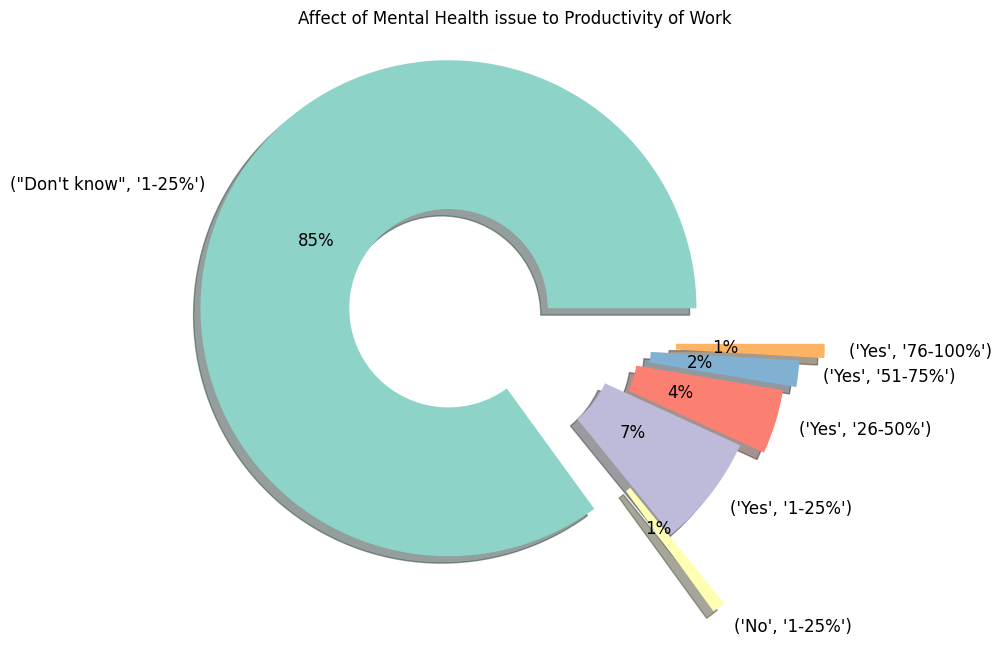

In [16]:
# Creating instance for class Visualize
vsl = Visualize()
# display pie chart to show the affect of mental issue to productivity
vsl.display_pie1()

ProductivityAffected  Professional_Treatment
Don't know            Yes                       1502
                      No                        1270
No                    No                          16
                      Yes                         12
Yes                   Yes                        280
                      No                         181
Name: Professional_Treatment, dtype: int64


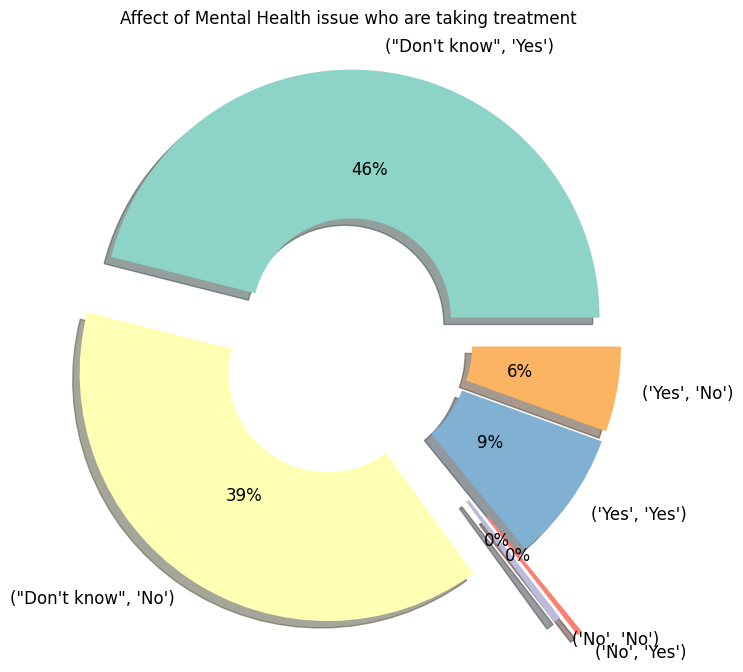

In [17]:
# display pie chart to show the affect of mental issue  who are seeking treatment
vsl.display_pie2()

current_MH_Disorder  ProductivityAffected
Don't Know           Don't know               135
                     Yes                       25
                     No                         2
Maybe                Don't know               585
                     Yes                      110
                     No                         3
No                   Don't know               952
                     Yes                      106
                     No                        15
Yes                  Don't know              1100
                     Yes                      220
                     No                         8
Name: ProductivityAffected, dtype: int64


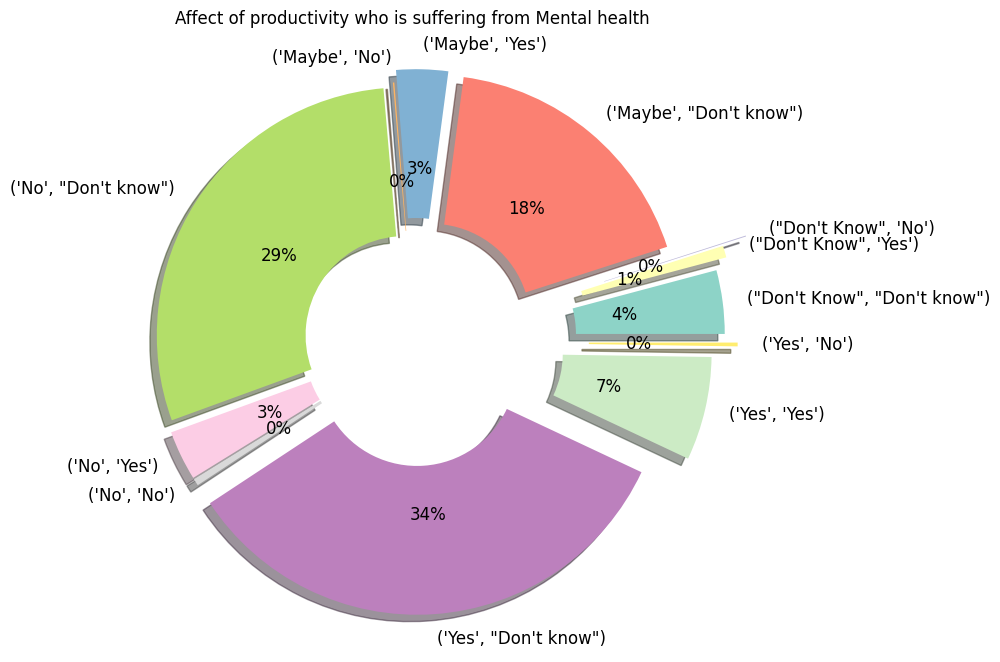

In [18]:
 # display pie chart to show the affect of  productivity who are suffering from mental health
vsl.display_pie3()

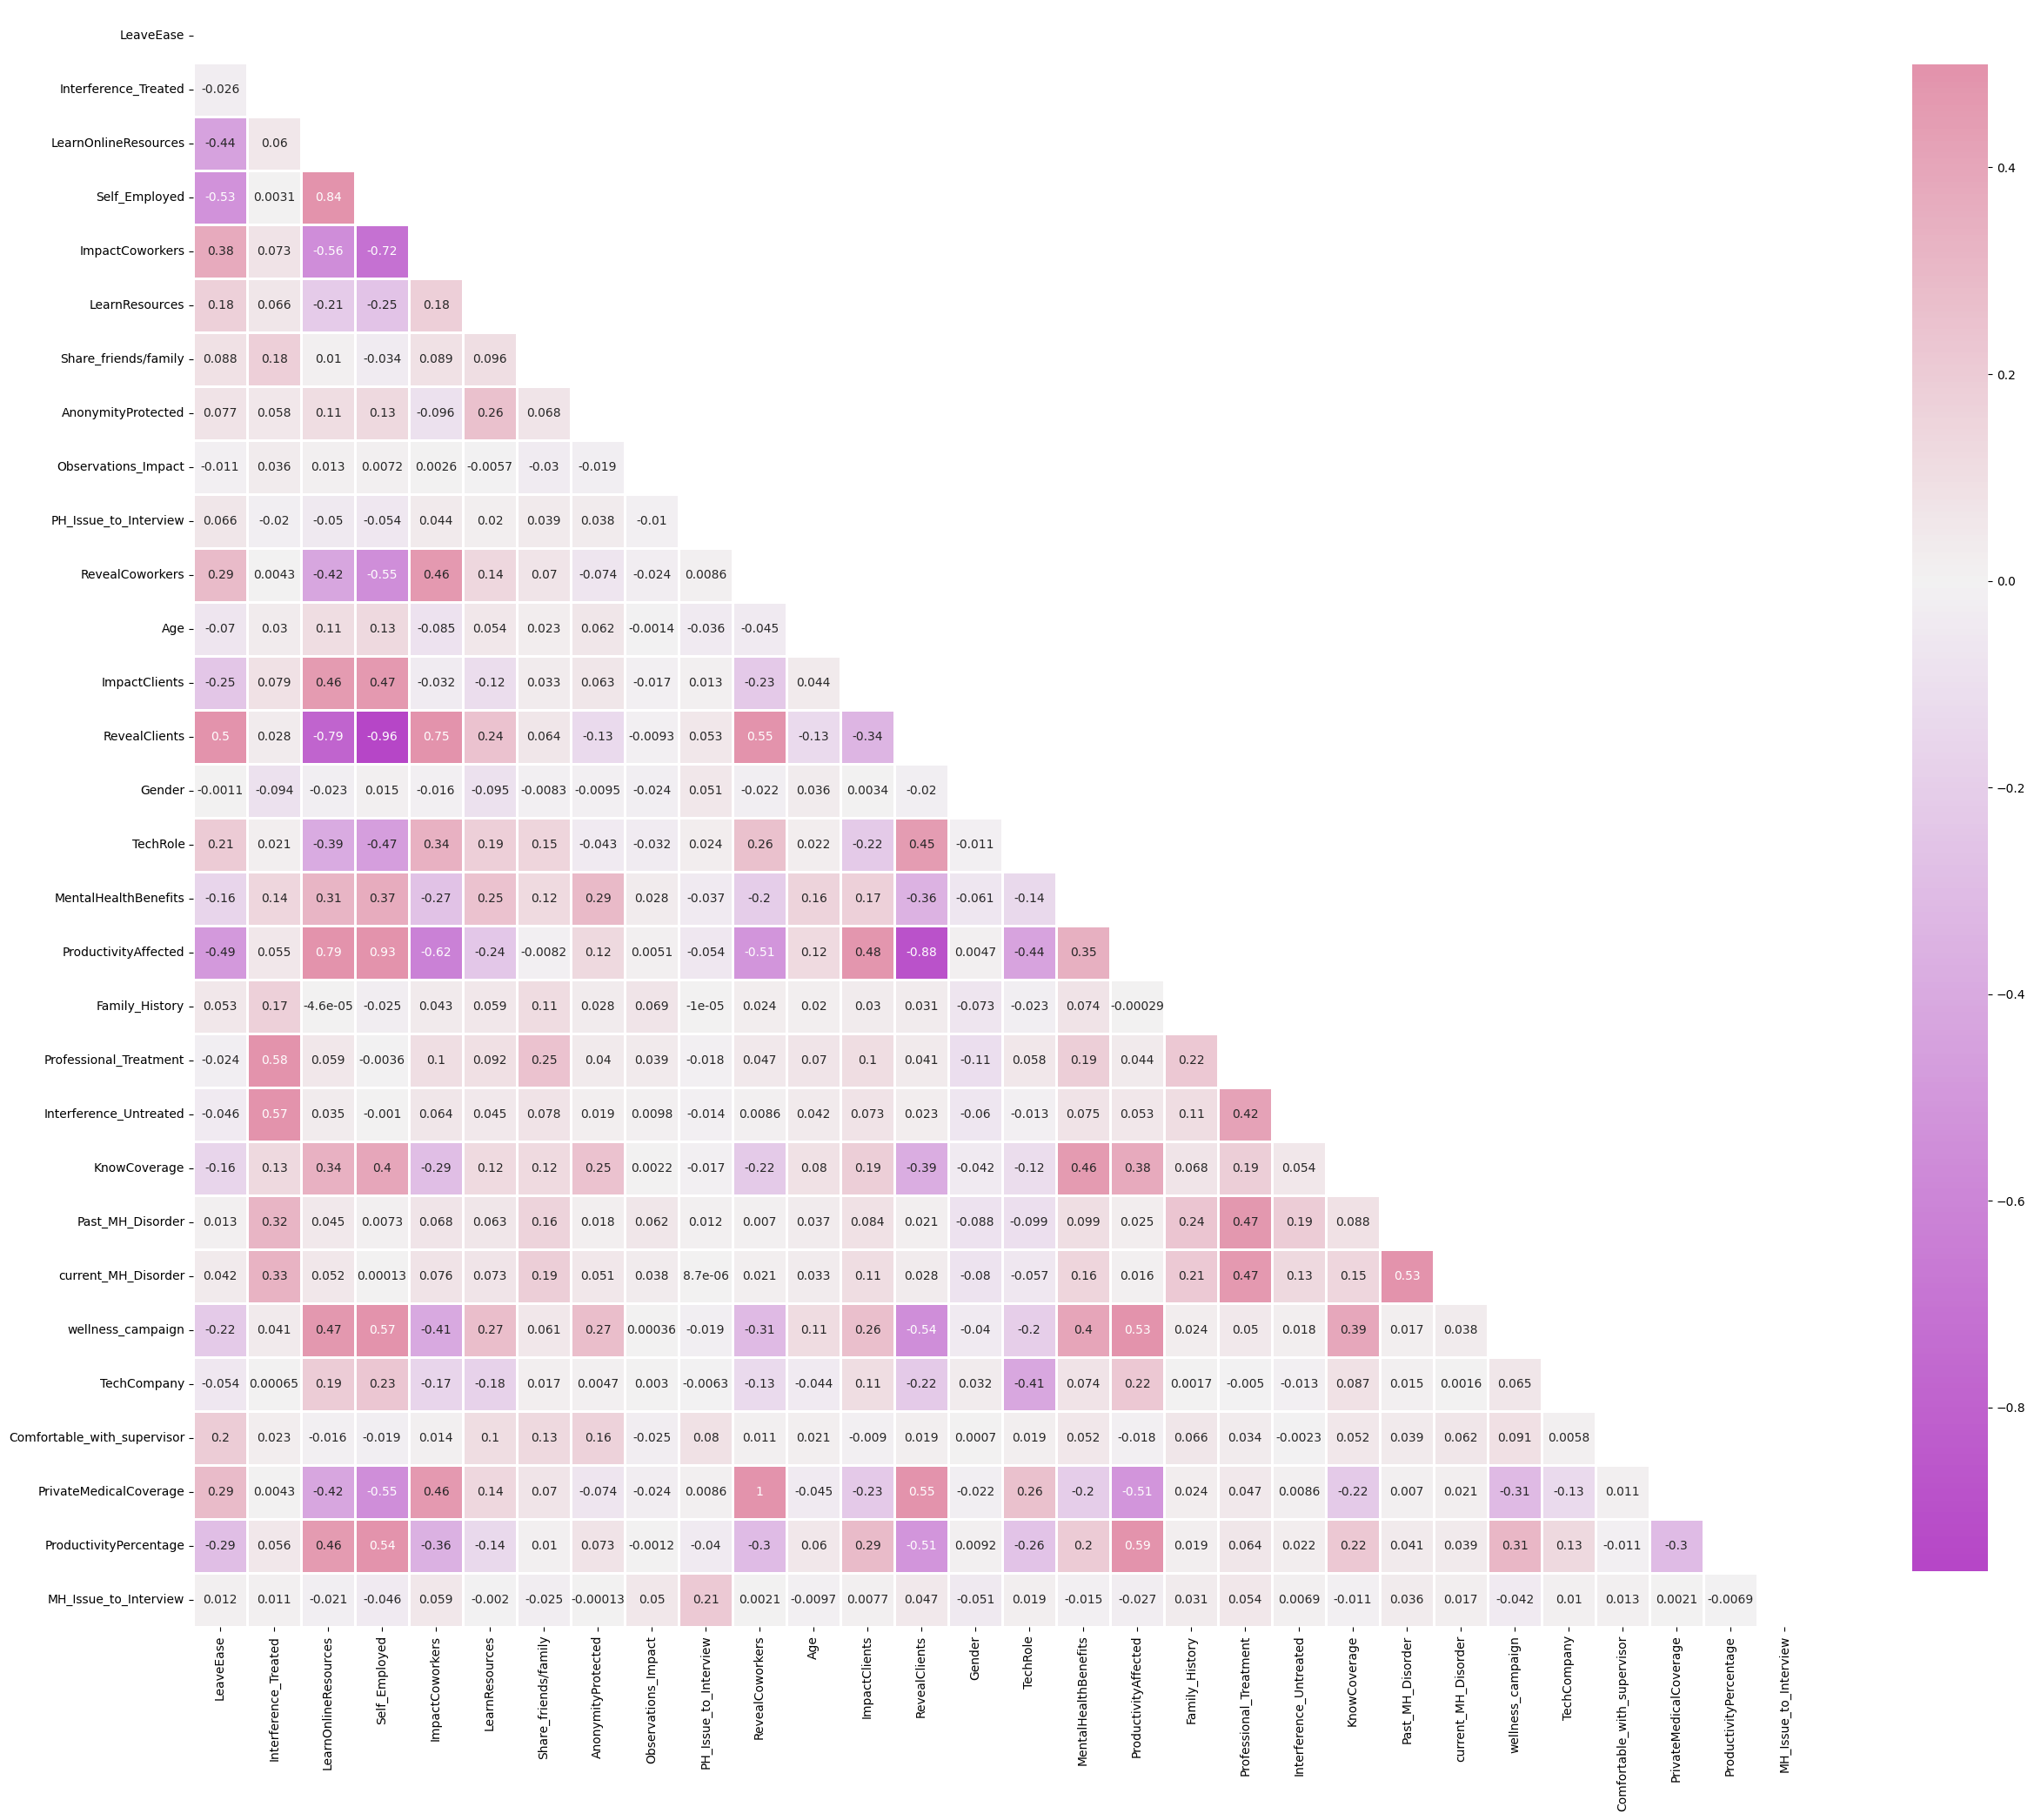

In [19]:
data1 = pd.read_csv("/content/drive/MyDrive/Merge Mental Health/cleanData.csv")
# creating instance for class DisplayHeatMap
hm = DisplayHeatMap(data1)
# ploting a heatmap and trying to understand the correlation of various features with the target variable
hm.plot_heatMap()

In [20]:
# Importing required liberies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report

Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       292
           1       0.85      0.81      0.83       361

    accuracy                           0.82       653
   macro avg       0.81      0.82      0.81       653
weighted avg       0.82      0.82      0.82       653



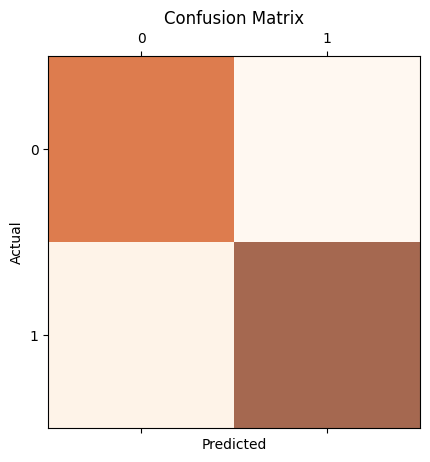

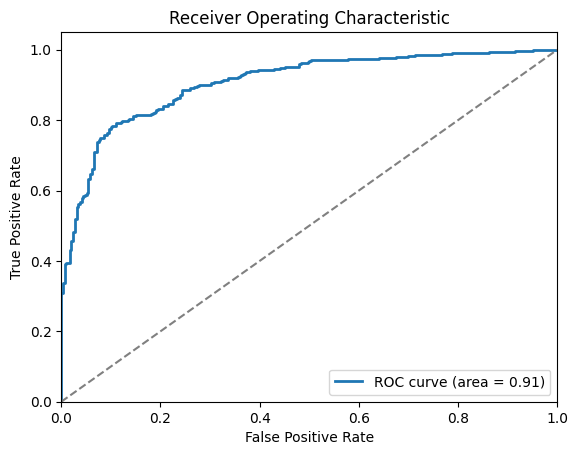

In [21]:
mld = Models()
# creating a model using Logistic Regression and checking for the accuracy of the model
mld.model_logisticR()

In [22]:
#  Trying to
 # creating a model using Linear Regression and checking for the accuracy of the model
mld.model_linearR()

Mean Squared Error: 0.12
R-squared: 0.51
0.5128315544020567
